***A identification of new sublineage is necessary annotate all aamutations sharing bettween the new clade***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date
import datetime
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Genomas que cada laboratorio produce y aún no sube al GISAID**

In [ ]:
annotation_nextclade = pd.read_csv("/content/drive/MyDrive/LBBM_2021/Mutation_search/result_all_c37_nextclade.csv",sep=";") # Se usa base de datos interna
annotation_nextclade.head()

,seqName,date,clade,qc.overallScore,qc.overallStatus,totalSubstitutions,totalDeletions,totalInsertions,totalAminoacidSubstitutions,totalAminoacidDeletions,totalMissing,totalNonACGTNs,totalPcrPrimerChanges,substitutions,deletions,insertions,aaSubstitutions,aaDeletions,missing,nonACGTNs,pcrPrimerChanges,alignmentScore,alignmentStart,alignmentEnd,qc.missingData.missingDataThreshold,qc.missingData.score,qc.missingData.status,qc.missingData.totalMissing,qc.mixedSites.mixedSitesThreshold,qc.mixedSites.score,qc.mixedSites.status,qc.mixedSites.totalMixedSites,qc.privateMutations.cutoff,qc.privateMutations.excess,qc.privateMutations.score,qc.privateMutations.status,qc.privateMutations.total,qc.snpClusters.clusteredSNPs,qc.snpClusters.score,qc.snpClusters.status,qc.snpClusters.totalSNPs,errors
0,hCoV-19/Argentina/INEI096534/2020,2020-11-08,20D,1.000000,good,28.0,30.0,0.0,19.0,10.0,0.0,1.0,0.0,"C241T,C3037T,C4002T,C7124T,T7424G,C9857T,T9867...","11288-11296,22299-22319",NaN,"N:P13L,N:R203K,N:G204R,N:G214C,ORF1a:T1246I,OR...","ORF1a:S3675-,ORF1a:G3676-,ORF1a:F3677-,S:R246-...",NaN,Y:29370,NaN,89249.0,47.0,29869.0,3000.0,0.0,good,0.0,10.0,10.0,good,1.0,24.0,-5.0,0.000000,good,3.0,NaN,0.0,good,0.0,NaN
1,hCoV-19/Argentina/INEI100632/2021,2021-01-29,20D,1.000000,good,28.0,30.0,0.0,19.0,10.0,0.0,1.0,0.0,"C241T,C3037T,C4002T,C7124T,T7424G,C9857T,T9867...","11288-11296,22299-22319",NaN,"N:P13L,N:R203K,N:G204R,N:G214C,ORF1a:T1246I,OR...","ORF1a:S3675-,ORF1a:G3676-,ORF1a:F3677-,S:R246-...",NaN,Y:29370,NaN,89129.0,54.0,29836.0,3000.0,0.0,good,0.0,10.0,10.0,good,1.0,24.0,-5.0,0.000000,good,3.0,NaN,0.0,good,0.0,NaN
2,hCoV-19/Argentina/INEI102214/2021,2021-03-09,20D,1.000000,good,30.0,30.0,0.0,20.0,10.0,0.0,1.0,0.0,"T63C,C241T,C3037T,C3130T,C4002T,C7124T,T7424G,...","11288-11296,22299-22319",NaN,"N:P13L,N:A119P,N:R203K,N:G204R,N:G214C,ORF1a:T...","ORF1a:S3675-,ORF1a:G3676-,ORF1a:F3677-,S:R246-...",NaN,Y:29370,NaN,89121.0,54.0,29836.0,3000.0,0.0,good,0.0,10.0,10.0,good,1.0,24.0,-3.0,0.000000,good,5.0,NaN,0.0,good,0.0,NaN
3,hCoV-19/Argentina/INEI102437/2021,2021-03-08,20D,0.173611,good,35.0,30.0,0.0,26.0,10.0,0.0,0.0,0.0,"C241T,C3037T,C4002T,C7124T,T7424G,C9298T,C9857...","11288-11296,22299-22319",NaN,"N:P13L,N:A119P,N:R203K,N:G204R,N:G214C,N:T366I...","ORF1a:S3675-,ORF1a:G3676-,ORF1a:F3677-,S:R246-...",NaN,NaN,NaN,89146.0,39.0,29836.0,3000.0,0.0,good,0.0,10.0,0.0,good,0.0,24.0,1.0,4.166667,good,9.0,NaN,0.0,good,0.0,NaN
4,hCoV-19/Argentina/INEI102438/2021,2021-03-08,20D,0.000000,good,33.0,30.0,0.0,24.0,10.0,0.0,0.0,0.0,"C241T,T1871G,C3037T,C4002T,C7124T,T7424G,C9857...","11288-11296,22299-22319",NaN,"N:P13L,N:A119P,N:R203K,N:G204R,N:G214C,N:T366I...","ORF1a:S3675-,ORF1a:G3676-,ORF1a:F3677-,S:R246-...",NaN,NaN,NaN,89259.0,4.0,29836.0,3000.0,0.0,good,0.0,10.0,0.0,good,0.0,24.0,-1.0,0.000000,good,7.0,NaN,0.0,good,0.0,NaN


In [ ]:
nextclade_data = annotation_nextclade.loc[:, ('seqName', 'date','substitutions', "deletions","insertions")] 
nextclade_data.head()

,seqName,date,substitutions,deletions,insertions
0,hCoV-19/Argentina/INEI096534/2020,2020-11-08,"C241T,C3037T,C4002T,C7124T,T7424G,C9857T,T9867...","11288-11296,22299-22319",NaN
1,hCoV-19/Argentina/INEI100632/2021,2021-01-29,"C241T,C3037T,C4002T,C7124T,T7424G,C9857T,T9867...","11288-11296,22299-22319",NaN
2,hCoV-19/Argentina/INEI102214/2021,2021-03-09,"T63C,C241T,C3037T,C3130T,C4002T,C7124T,T7424G,...","11288-11296,22299-22319",NaN
3,hCoV-19/Argentina/INEI102437/2021,2021-03-08,"C241T,C3037T,C4002T,C7124T,T7424G,C9298T,C9857...","11288-11296,22299-22319",NaN
4,hCoV-19/Argentina/INEI102438/2021,2021-03-08,"C241T,T1871G,C3037T,C4002T,C7124T,T7424G,C9857...","11288-11296,22299-22319",NaN


In [ ]:
nextclade_data = nextclade_data.sort_values(by=['date'],ascending=True,ignore_index=True) # fitro de fechas
nextclade_data

,seqName,date,substitutions,deletions,insertions
0,hCoV-19/Argentina/INEI096534/2020,2020-11-08,"C241T,C3037T,C4002T,C7124T,T7424G,C9857T,T9867...","11288-11296,22299-22319",NaN
1,hCoV-19/Peru/LIM-INS-869/2020,2020-11-30,"C241T,C3037T,C4002T,C4893T,C7124T,T7424G,C9857...","11288-11296,28271",NaN
2,hCoV-19/Peru/LIM-INS-895/2020,2020-12-22,"C241T,C3037T,C4002T,C7124T,T7424G,C9857T,T9867...","11288-11296,22299-22319",NaN
3,hCoV-19/Peru/LIM-UPCH-0372/2021,2021-01-01,"C241T,C3037T,C4002T,C7124T,T7424G,C9857T,T9867...",22299-22319,NaN
4,hCoV-19/Peru/SAM-INS-2426/2021,2021-01-08,"C241T,C3037T,C4002T,C7124T,T7424G,C9857T,T9867...","11288-11296,22299-22319",NaN
...,...,...,...,...,...
4693,hCoV-19/Ecuador/USFQ-1856/2021,2021-07-30,"C241T,C3037T,C4002T,C7124T,T7424G,C10029T,C144...",1820,NaN
4694,hCoV-19/Switzerland/SO-ETHZ-33628786/2021,2021-07-31,"C241T,C3037T,C4002T,C7124T,T7424G,C9857T,T9867...","11288-11296,22299-22319",NaN
4695,hCoV-19/Spain/MD-HULP-14383703/2021,2021-08-01,"C241T,C3037T,C4002T,C7124T,T7424G,C9857T,T9867...",NaN,NaN
4696,hCoV-19/USA/VT-CDCBI-CRSP_G3GVF3OP4IUCUWDQ/2021,2021-08-03,"C241T,T1303A,C3037T,G3307T,C4002T,C7124T,T7424...","11288-11296,22299-22319",NaN


In [ ]:
def spike_Nexclade(array_mutations):

  spike_array = []
   
  for i in array_mutations.split(","):
    spike_array.append(i)

  return spike_array

In [ ]:
def year_fraction(date): # Transformar tiempo en décimal
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year+1, 1, 1).toordinal() - start
    return date.year + float(date.toordinal() - start) / year_length

In [ ]:
df_pos = -1

nextclade_mutations_date = {}
nextclade_mutations_binary = {}


for i in nextclade_data["substitutions"]:
  
  df_pos += 1
  if type(i) != float:
    nextclade_mutations_date[nextclade_data["seqName"][df_pos]] = {} 
    spike_list = spike_Nexclade(i)
    nextclade_mutations_binary[nextclade_data["seqName"][df_pos]] = dict.fromkeys(spike_list,1)
    nextclade_mutations_date[nextclade_data["seqName"][df_pos]] = dict.fromkeys(spike_list,year_fraction(date.fromisoformat(nextclade_data['date'][df_pos])))

print(nextclade_mutations_date)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
print(len(nextclade_mutations_binary),len(nextclade_mutations_date))

4679 4679


In [ ]:
nextclade_mutaciones = pd.DataFrame.from_dict(nextclade_mutations_date).T

In [ ]:
nextclade_mutaciones.shape

(4679, 5554)

In [ ]:
aamut_nextclade = {}

for i  in nextclade_mutaciones:
  if (len(nextclade_mutaciones[i]) - sum(pd.isnull(nextclade_mutaciones[i]))) >= 40 :
    aamut_nextclade[i] = len(nextclade_mutaciones[i]) - sum(pd.isnull(nextclade_mutaciones[i]))
  #print(len(pd_mutaciones[i]),sum(pd.isnull(pd_mutaciones[i])),i)

print(len(aamut_nextclade),aamut_nextclade)

119 {'C241T': 4623, 'C3037T': 4667, 'C4002T': 4467, 'C7124T': 4416, 'T7424G': 4475, 'C9857T': 4407, 'T9867C': 4487, 'C10029T': 4493, 'G10097A': 3777, 'C13536T': 4394, 'C14408T': 4658, 'G21786T': 4263, 'C21789T': 4387, 'T22917A': 4444, 'T23031C': 4426, 'A23403G': 4672, 'C23731T': 4465, 'C24138A': 4463, 'C26894T': 3079, 'C28253T': 4431, 'A28271T': 4481, 'C28311T': 4476, 'G28881A': 4436, 'G28882A': 4421, 'G28883C': 4434, 'G28913T': 4469, 'C29311T': 4363, 'C29370T': 1247, 'C21575T': 125, 'C28849T': 1267, 'T11296G': 115, 'A23702G': 225, 'G28044T': 227, 'G11291A': 73, 'G22973C': 45, 'T7534C': 81, 'G3307T': 229, 'T11428A': 227, 'C29750T': 113, 'C11750T': 77, 'G25855T': 51, 'G23587T': 322, 'C28435T': 213, 'C1059T': 118, 'A20262G': 55, 'C21846T': 41, 'G25563T': 109, 'C27925T': 51, 'C12114T': 92, 'T3952C': 369, 'C21727T': 367, 'C26885T': 371, 'A15640G': 66, 'C10336T': 152, 'A10323G': 55, 'A28254C': 147, 'C25517T': 48, 'T20631C': 63, 'G11083T': 68, 'A26766G': 88, 'C28000T': 91, 'C27737T': 82, 'C2

In [ ]:
nextclade_mutaciones = nextclade_mutaciones.reset_index()
nextclade_mutaciones.head()

,index,C241T,C3037T,C4002T,C7124T,T7424G,C9857T,T9867C,C10029T,G10097A,C13536T,C14408T,G21786T,C21789T,T22917A,T23031C,A23403G,C23731T,C24138A,C26600T,C26894T,C28253T,A28271T,C28311T,G28881A,G28882A,G28883C,G28913T,C29311T,C4893T,G21295A,G21296A,T22020C,C26645T,C27211T,C28687T,C29421T,G22801T,C29370T,G29162A,...,A20251G,A26528G,A5995G,A17971C,C12036G,G8939T,A16932T,T4945C,T27785C,G29195T,T5056G,G15982A,C23059T,A27658T,C5184T,C14688T,T3049C,T9370C,C27807G,A27162C,T7288G,C29666T,A8089G,G25320T,C5115T,C4071T,T23371C,G25444A,C6883T,C11328T,G27666A,T2264G,G8137T,T27436C,G27962T,G20734A,T13725C,G26314A,T451A,T19929C
0,hCoV-19/Argentina/INEI096534/2020,2020.852459,2020.852459,2020.852459,2020.852459,2020.852459,2020.852459,2020.852459,2020.852459,2020.852459,2020.852459,2020.852459,2020.852459,2020.852459,2020.852459,2020.852459,2020.852459,2020.852459,2020.852459,2020.852459,2020.852459,2020.852459,2020.852459,2020.852459,2020.852459,2020.852459,2020.852459,2020.852459,2020.852459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,hCoV-19/Peru/LIM-INS-869/2020,2020.912568,2020.912568,2020.912568,2020.912568,2020.912568,2020.912568,2020.912568,NaN,2020.912568,2020.912568,2020.912568,NaN,NaN,NaN,NaN,2020.912568,2020.912568,NaN,NaN,NaN,NaN,NaN,NaN,2020.912568,2020.912568,2020.912568,2020.912568,NaN,2020.912568,2020.912568,2020.912568,2020.912568,2020.912568,2020.912568,2020.912568,2020.912568,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,hCoV-19/Peru/LIM-INS-895/2020,2020.972678,2020.972678,2020.972678,2020.972678,2020.972678,2020.972678,2020.972678,2020.972678,2020.972678,2020.972678,2020.972678,2020.972678,2020.972678,2020.972678,2020.972678,2020.972678,2020.972678,2020.972678,NaN,2020.972678,2020.972678,2020.972678,2020.972678,2020.972678,2020.972678,2020.972678,2020.972678,2020.972678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.972678,2020.972678,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,hCoV-19/Peru/LIM-UPCH-0372/2021,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,NaN,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.000000,2021.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,hCoV-19/Peru/SAM-INS-2426/2021,2021.019178,2021.019178,2021.019178,2021.019178,2021.019178,2021.019178,2021.019178,2021.019178,2021.019178,2021.019178,2021.019178,2021.019178,2021.019178,2021.019178,2021.019178,2021.019178,2021.019178,2021.019178,NaN,NaN,2021.019178,2021.019178,2021.019178,2021.019178,2021.019178,2021.019178,2021.019178,2021.019178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
nextclade_mutaciones.shape

(4679, 5555)

***Dict de las deleciones***

In [ ]:
df_pos = -1

nextclade_aaDEL_date = {}
nextclade_aaDEL_binary = {}


for i in nextclade_data["deletions"]:
  
  df_pos += 1
  if type(i) != float:
    nextclade_aaDEL_date[nextclade_data["seqName"][df_pos]] = {} 
    spike_list = spike_Nexclade(i)
    nextclade_aaDEL_binary[nextclade_data["seqName"][df_pos]] = dict.fromkeys(spike_list,1)
    nextclade_aaDEL_date[nextclade_data["seqName"][df_pos]] = dict.fromkeys(spike_list,year_fraction(date.fromisoformat(nextclade_data['date'][df_pos])))

print(nextclade_aaDEL_date)

{'hCoV-19/Argentina/INEI096534/2020': {'11288-11296': 2020.8524590163934, '22299-22319': 2020.8524590163934}, 'hCoV-19/Peru/LIM-INS-869/2020': {'11288-11296': 2020.9125683060108, '28271': 2020.9125683060108}, 'hCoV-19/Peru/LIM-INS-895/2020': {'11288-11296': 2020.9726775956285, '22299-22319': 2020.9726775956285}, 'hCoV-19/Peru/LIM-UPCH-0372/2021': {'22299-22319': 2021.0}, 'hCoV-19/Peru/SAM-INS-2426/2021': {'11288-11296': 2021.0191780821917, '22299-22319': 2021.0191780821917}, 'hCoV-19/Peru/SAM-INS-2421/2021': {'11288-11296': 2021.021917808219, '22299-22319': 2021.021917808219}, 'hCoV-19/Peru/SAM-INS-2419/2021': {'11288-11296': 2021.027397260274, '22299-22319': 2021.027397260274}, 'hCoV-19/Peru/LIM-INS-737/2021': {'11288-11296': 2021.0301369863014, '22299-22319': 2021.0301369863014}, 'hCoV-19/Peru/LIM-INS-734/2021': {'11288-11296': 2021.0301369863014, '22299-22319': 2021.0301369863014}, 'hCoV-19/Peru/LIM-INS-731/2021': {'11288-11296': 2021.0301369863014, '22299-22319': 2021.0301369863014

In [ ]:
nextclade_aaDEl = pd.DataFrame.from_dict(nextclade_aaDEL_date).T

In [ ]:
aaDEL_freq = {}

for i  in nextclade_aaDEl:
  if (len(nextclade_aaDEl[i]) - sum(pd.isnull(nextclade_aaDEl[i]))) >= 200 :
    aaDEL_freq[i] = len(nextclade_aaDEl[i]) - sum(pd.isnull(nextclade_aaDEl[i]))
  #print(len(pd_mutaciones[i]),sum(pd.isnull(pd_mutaciones[i])),i)

print(len(aaDEL_freq),aaDEL_freq)

2 {'11288-11296': 4430, '22299-22319': 3765}


In [ ]:
nextclade_aaDEl = nextclade_aaDEl.reset_index()
nextclade_aaDEl.head()

,index,11288-11296,22299-22319,28271,21749-21787,22265-22285,29738-29760,22301-22321,21765-21770,21998-22000,26159-26161,22238-22258,25447-25476,28271-28272,27688-27696,11285-11293,27388-27395,509-523,11288-11290,18743-18751,22301-22319,11069-11077,21768-21770,28881-28883,11288-11293,515-517,21090,21992-21994,29840-29853,22292-22312,22034-22054,21990-21992,29725-29775,25714-25716,26158-26161,21749-21785,686-694,1605-1607,28253,28090-28095,...,515-520,29835,29737-29748,22298-22299,29749-29761,22302,26486-26487,29768-29769,29772-29773,29777-29781,29768-29779,29771-29785,27580-27607,27599-27620,29854,7,28090-28092,27583-27618,3333-3335,27290-27292,22298-22300,21776-21778,22220-22240,27601-27625,27682-27695,11279-11283,8651-8683,22202-22222,3953-3961,21562,22298-22309,26,29861,27498-27503,201-204,22299-22317,27682-27693,22277-22297,29746-29762,1820
0,hCoV-19/Argentina/INEI096534/2020,2020.852459,2020.852459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,hCoV-19/Peru/LIM-INS-869/2020,2020.912568,NaN,2020.912568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,hCoV-19/Peru/LIM-INS-895/2020,2020.972678,2020.972678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,hCoV-19/Peru/LIM-UPCH-0372/2021,NaN,2021.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,hCoV-19/Peru/SAM-INS-2426/2021,2021.019178,2021.019178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***Join two Dataframe one of aaMut and aaDel of Spike protein***

In [ ]:
join_nextclade = pd.merge(nextclade_mutaciones, nextclade_aaDEl, on="index")
join_nextclade_1 = join_nextclade.set_index("index")
join_nextclade_1.index.name = None

In [ ]:
aamut_nextclade.update(aaDEL_freq)
print(len(aamut_nextclade), aamut_nextclade)

121 {'C241T': 4623, 'C3037T': 4667, 'C4002T': 4467, 'C7124T': 4416, 'T7424G': 4475, 'C9857T': 4407, 'T9867C': 4487, 'C10029T': 4493, 'G10097A': 3777, 'C13536T': 4394, 'C14408T': 4658, 'G21786T': 4263, 'C21789T': 4387, 'T22917A': 4444, 'T23031C': 4426, 'A23403G': 4672, 'C23731T': 4465, 'C24138A': 4463, 'C26894T': 3079, 'C28253T': 4431, 'A28271T': 4481, 'C28311T': 4476, 'G28881A': 4436, 'G28882A': 4421, 'G28883C': 4434, 'G28913T': 4469, 'C29311T': 4363, 'C29370T': 1247, 'C21575T': 125, 'C28849T': 1267, 'T11296G': 115, 'A23702G': 225, 'G28044T': 227, 'G11291A': 73, 'G22973C': 45, 'T7534C': 81, 'G3307T': 229, 'T11428A': 227, 'C29750T': 113, 'C11750T': 77, 'G25855T': 51, 'G23587T': 322, 'C28435T': 213, 'C1059T': 118, 'A20262G': 55, 'C21846T': 41, 'G25563T': 109, 'C27925T': 51, 'C12114T': 92, 'T3952C': 369, 'C21727T': 367, 'C26885T': 371, 'A15640G': 66, 'C10336T': 152, 'A10323G': 55, 'A28254C': 147, 'C25517T': 48, 'T20631C': 63, 'G11083T': 68, 'A26766G': 88, 'C28000T': 91, 'C27737T': 82, 'C2

In [ ]:
nextclade_frequencies = pd.DataFrame.from_dict(aamut_nextclade, orient='index')
nextclade_frequencies = nextclade_frequencies.reset_index()
nextclade_frequencies.head()

,index,0
0,C241T,4623
1,C3037T,4667
2,C4002T,4467
3,C7124T,4416
4,T7424G,4475


In [ ]:
nextclade_fechas = join_nextclade_1.min()
nextclade_fechas = nextclade_fechas.reset_index()
nextclade_fechas

,index,0
0,C241T,2020.852459
1,C3037T,2020.852459
2,C4002T,2020.852459
3,C7124T,2020.852459
4,T7424G,2020.852459
...,...,...
5719,22299-22317,2021.531507
5720,27682-27693,2021.536986
5721,22277-22297,2021.547945
5722,29746-29762,2021.567123


In [ ]:
aamut_nextclade = pd.merge(nextclade_fechas, nextclade_frequencies, on="index" )
aamut_nextclade  = aamut_nextclade.rename({'index': 'mutations_nextclade', '0_x': 'date', '0_y': 'Frequency absolute' }, axis=1)
aamut_nextclade

,mutations_nextclade,date,Frequency absolute
0,C241T,2020.852459,4623
1,C3037T,2020.852459,4667
2,C4002T,2020.852459,4467
3,C7124T,2020.852459,4416
4,T7424G,2020.852459,4475
...,...,...,...
116,T7012G,2021.413699,42
117,C1780T,2021.424658,47
118,G18255T,2021.465753,72
119,11288-11296,2020.852459,4430


In [ ]:
aamut_nextclade.to_csv("/content/drive/MyDrive/LBBM_2021/Mutation_search/nt_mutations_C37.tsv", sep='\t')

<Figure size 1440x1080 with 0 Axes>

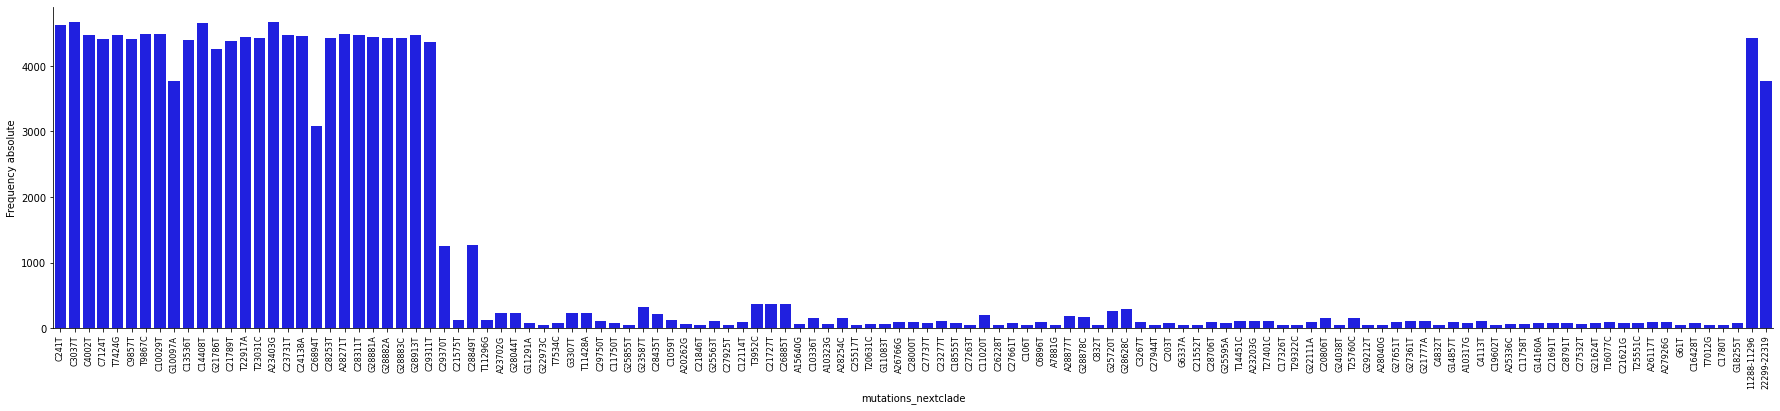

In [ ]:
plt.figure(figsize=(20, 15))
g = sns.catplot(x=aamut_nextclade["mutations_nextclade"] ,y=aamut_nextclade["Frequency absolute"] ,data=aamut_nextclade,kind='bar',aspect=5, color="blue")
g.set_xticklabels(rotation=90, fontsize=8)

[Text(0, 0, 'C241T'),
 Text(0, 0, 'C3037T'),
 Text(0, 0, 'C4002T'),
 Text(0, 0, 'C7124T'),
 Text(0, 0, 'T7424G'),
 Text(0, 0, 'C9857T'),
 Text(0, 0, 'T9867C'),
 Text(0, 0, 'C10029T'),
 Text(0, 0, 'G10097A'),
 Text(0, 0, 'C13536T'),
 Text(0, 0, 'C14408T'),
 Text(0, 0, 'G21786T'),
 Text(0, 0, 'C21789T'),
 Text(0, 0, 'T22917A'),
 Text(0, 0, 'T23031C'),
 Text(0, 0, 'A23403G'),
 Text(0, 0, 'C23731T'),
 Text(0, 0, 'C24138A'),
 Text(0, 0, 'C26894T'),
 Text(0, 0, 'C28253T'),
 Text(0, 0, 'A28271T'),
 Text(0, 0, 'C28311T'),
 Text(0, 0, 'G28881A'),
 Text(0, 0, 'G28882A'),
 Text(0, 0, 'G28883C'),
 Text(0, 0, 'G28913T'),
 Text(0, 0, 'C29311T'),
 Text(0, 0, 'C29370T'),
 Text(0, 0, 'C21575T'),
 Text(0, 0, 'C28849T'),
 Text(0, 0, 'T11296G'),
 Text(0, 0, 'A23702G'),
 Text(0, 0, 'G28044T'),
 Text(0, 0, 'G11291A'),
 Text(0, 0, 'G22973C'),
 Text(0, 0, 'T7534C'),
 Text(0, 0, 'G3307T'),
 Text(0, 0, 'T11428A'),
 Text(0, 0, 'C29750T'),
 Text(0, 0, 'C11750T'),
 Text(0, 0, 'G25855T'),
 Text(0, 0, 'G23587T'),
 T

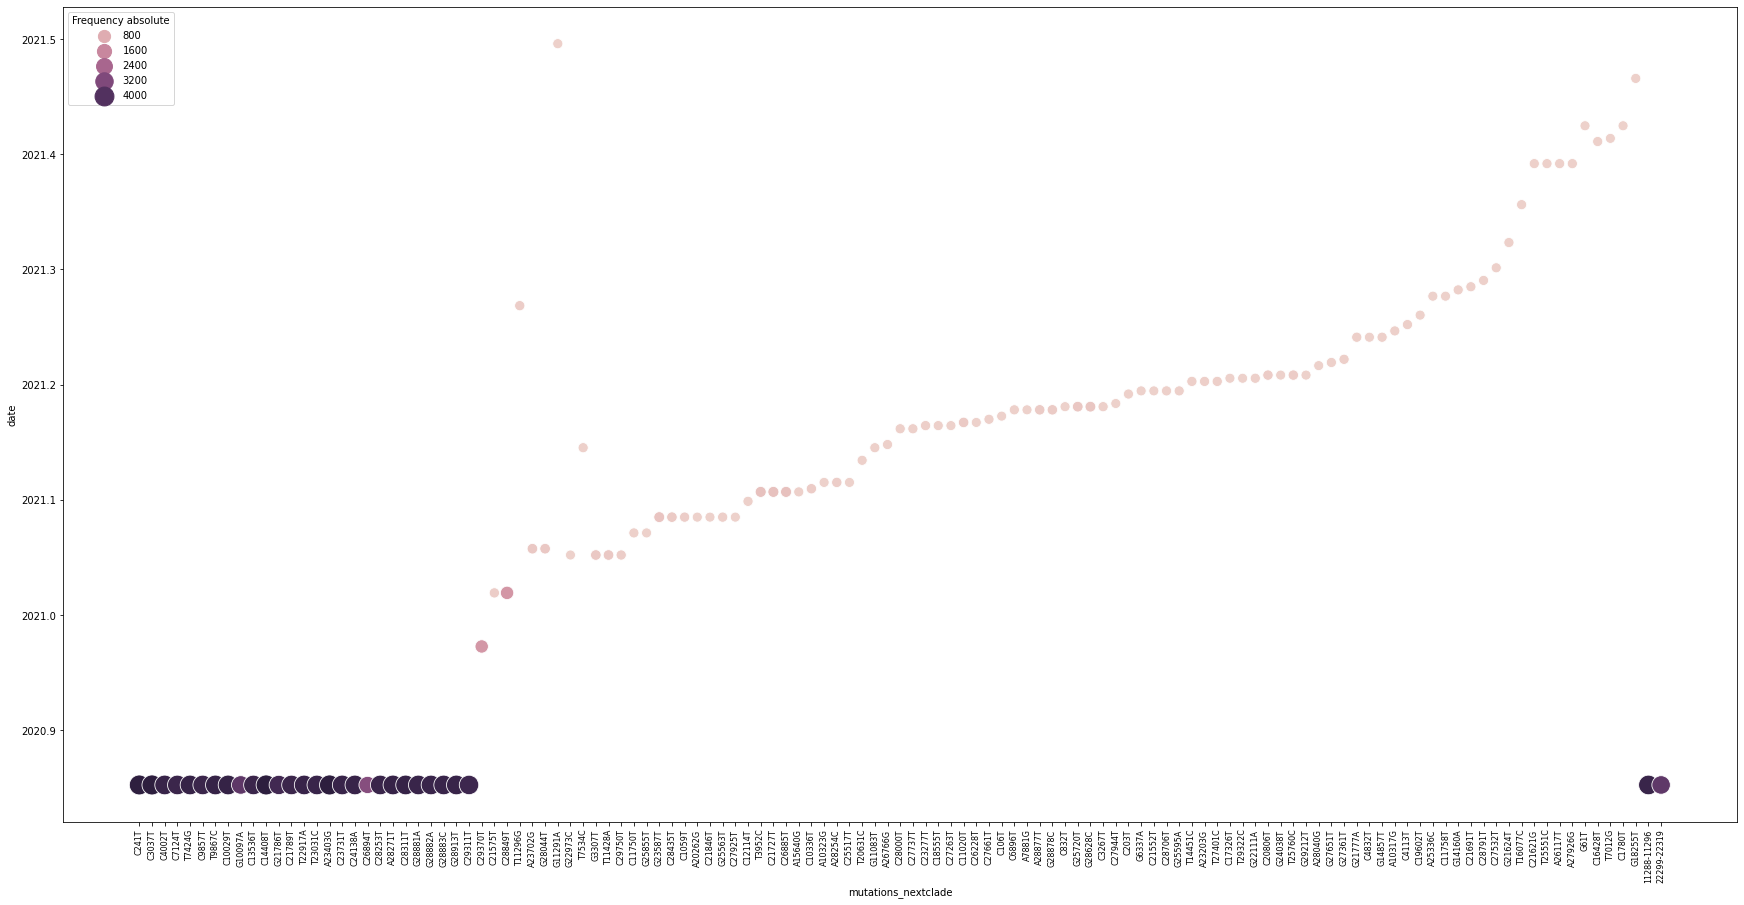

In [ ]:
plt.figure(figsize=(30, 15))
plt.xticks(rotation = 90)
ax = sns.scatterplot(data=aamut_nextclade, x="mutations_nextclade", y="date", hue="Frequency absolute", size="Frequency absolute", sizes=(100, 400))
ax.set_xticklabels(labels=aamut_nextclade["mutations_nextclade"], fontsize=8)

In [ ]:
array_genomes_nextclade = []

for i in aamut_nextclade["mutations_nextclade"]:
  genomes_early = (join_nextclade_1[join_nextclade_1[i] == join_nextclade_1[i].min()].index)
  lista = list(genomes_early)
  for i in lista:
    array_genomes_nextclade.append(i)

array_genomes_nextclade = list(set(array_genomes_nextclade))

array_genomes_nextclade

['hCoV-19/Chile/RM-30972/2021',
 'hCoV-19/Argentina/INEI102438/2021',
 'hCoV-19/USA/NY-PRL-2021_0503_01D15/2021',
 'hCoV-19/Ecuador/NIC-INSPI-268325/2021',
 'hCoV-19/Peru/LIM-INS-895/2020',
 'hCoV-19/Chile/AN-67459/2021',
 'hCoV-19/USA/NY-PRL-2021_02_17_00H16/2021',
 'hCoV-19/USA/CT-Yale-1627/2021',
 'hCoV-19/Chile/AN-PUC_MVL_1063/2021',
 'hCoV-19/Chile/PUC_MVL_1048/2021',
 'hCoV-19/England/CAMC-13962F4/2021',
 'hCoV-19/Peru/LIM-INS-1711/2021',
 'hCoV-19/Peru/SAM-INS-2426/2021',
 'hCoV-19/USA/MD-CDC-LC0027269/2021',
 'hCoV-19/Mexico/YUC-InDRE_FB13187_S1693/2021',
 'hCoV-19/Chile/RM-38165/2021',
 'hCoV-19/Peru/un-CDC-2-4069940/2021',
 'hCoV-19/France/NAQ-HCL021126618101/2021',
 'hCoV-19/Peru/LAL-INS-1671/2021',
 'hCoV-19/Spain/NC-CHN-01003728/2021',
 'hCoV-19/USA/GA-CDC-LC0030396/2021',
 'hCoV-19/USA/CA-CDPH-3000041288/2021',
 'hCoV-19/Peru/AYA-INS-1562/2021',
 'hCoV-19/Argentina/INEI096534/2020',
 'hCoV-19/Peru/un-CDC-2-4069939/2021',
 'hCoV-19/Peru/LIM-INS-1938/2021',
 'hCoV-19/USA/FL

In [ ]:
genomes_early_nextclade = join_nextclade_1.loc[array_genomes_nextclade]
genomes_early_nextclade = genomes_early_nextclade.dropna(axis = 1, how = 'all')
genomes_early_nextclade

,C241T,C3037T,C4002T,C7124T,T7424G,C9857T,T9867C,C10029T,G10097A,C13536T,C14408T,G21786T,C21789T,T22917A,T23031C,A23403G,C23731T,C24138A,C26600T,C26894T,C28253T,A28271T,C28311T,G28881A,G28882A,G28883C,G28913T,C29311T,G22801T,C29370T,C21575T,C28849T,C18591T,T11296G,A23702G,G28044T,G11291A,G22973C,T7534C,C2838T,...,C28791T,A1558C,C7125T,C27532T,A29373G,C17304T,A5068C,G21624T,G21974C,T16077C,C29509T,G8861A,C9985T,C21621G,T25551C,A26117T,A27926G,G29477T,G61T,C183T,C16428T,T7012G,T505G,C1780T,C28214T,G18255T,G23302A,11288-11296,22299-22319,28271,21749-21787,29738-29760,22301-22321,21998-22000,26159-26161,515-517,29840-29853,11288-11289,29835,11279-11283
hCoV-19/Chile/RM-30972/2021,2021.106849,2021.106849,2021.106849,2021.106849,2021.106849,2021.106849,2021.106849,2021.106849,2021.106849,2021.106849,2021.106849,2021.106849,2021.106849,2021.106849,2021.106849,2021.106849,2021.106849,2021.106849,NaN,2021.106849,2021.106849,2021.106849,2021.106849,2021.106849,2021.106849,2021.106849,2021.106849,2021.106849,NaN,2021.106849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.106849,2021.106849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hCoV-19/Argentina/INEI102438/2021,2021.180822,2021.180822,2021.180822,2021.180822,2021.180822,2021.180822,2021.180822,2021.180822,2021.180822,2021.180822,2021.180822,2021.180822,2021.180822,2021.180822,2021.180822,2021.180822,2021.180822,2021.180822,NaN,2021.180822,2021.180822,2021.180822,2021.180822,2021.180822,2021.180822,2021.180822,2021.180822,2021.180822,NaN,2021.180822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.180822,2021.180822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hCoV-19/USA/NY-PRL-2021_0503_01D15/2021,2021.323288,2021.323288,NaN,2021.323288,2021.323288,2021.323288,2021.323288,2021.323288,2021.323288,2021.323288,NaN,2021.323288,2021.323288,2021.323288,2021.323288,2021.323288,2021.323288,2021.323288,NaN,2021.323288,2021.323288,2021.323288,2021.323288,2021.323288,2021.323288,2021.323288,2021.323288,2021.323288,NaN,2021.323288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2021.323288,2021.323288,2021.323288,2021.323288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.323288,2021.323288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hCoV-19/Ecuador/NIC-INSPI-268325/2021,2021.221918,2021.221918,2021.221918,2021.221918,2021.221918,2021.221918,NaN,2021.221918,2021.221918,2021.221918,NaN,2021.221918,2021.221918,2021.221918,2021.221918,2021.221918,2021.221918,2021.221918,NaN,2021.221918,2021.221918,2021.221918,2021.221918,2021.221918,2021.221918,2021.221918,2021.221918,2021.221918,NaN,2021.221918,NaN,2021.221918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.221918,2021.221918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hCoV-19/Peru/LIM-INS-895/2020,2020.972678,2020.972678,2020.972678,2020.972678,2020.972678,2020.972678,2020.972678,2020.972678,2020.972678,2020.972678,2020.972678,2020.972678,2020.972678,2020.972678,2020.972678,2020.972678,2020.972678,2020.972678,NaN,2020.972678,2020.972678,2020.972678,2020.972678,2020.972678,2020.972678,2020.972678,2020.972678,2020.972678,2020.972678,2020.972678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.972678,2020.972678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hCoV-19/C

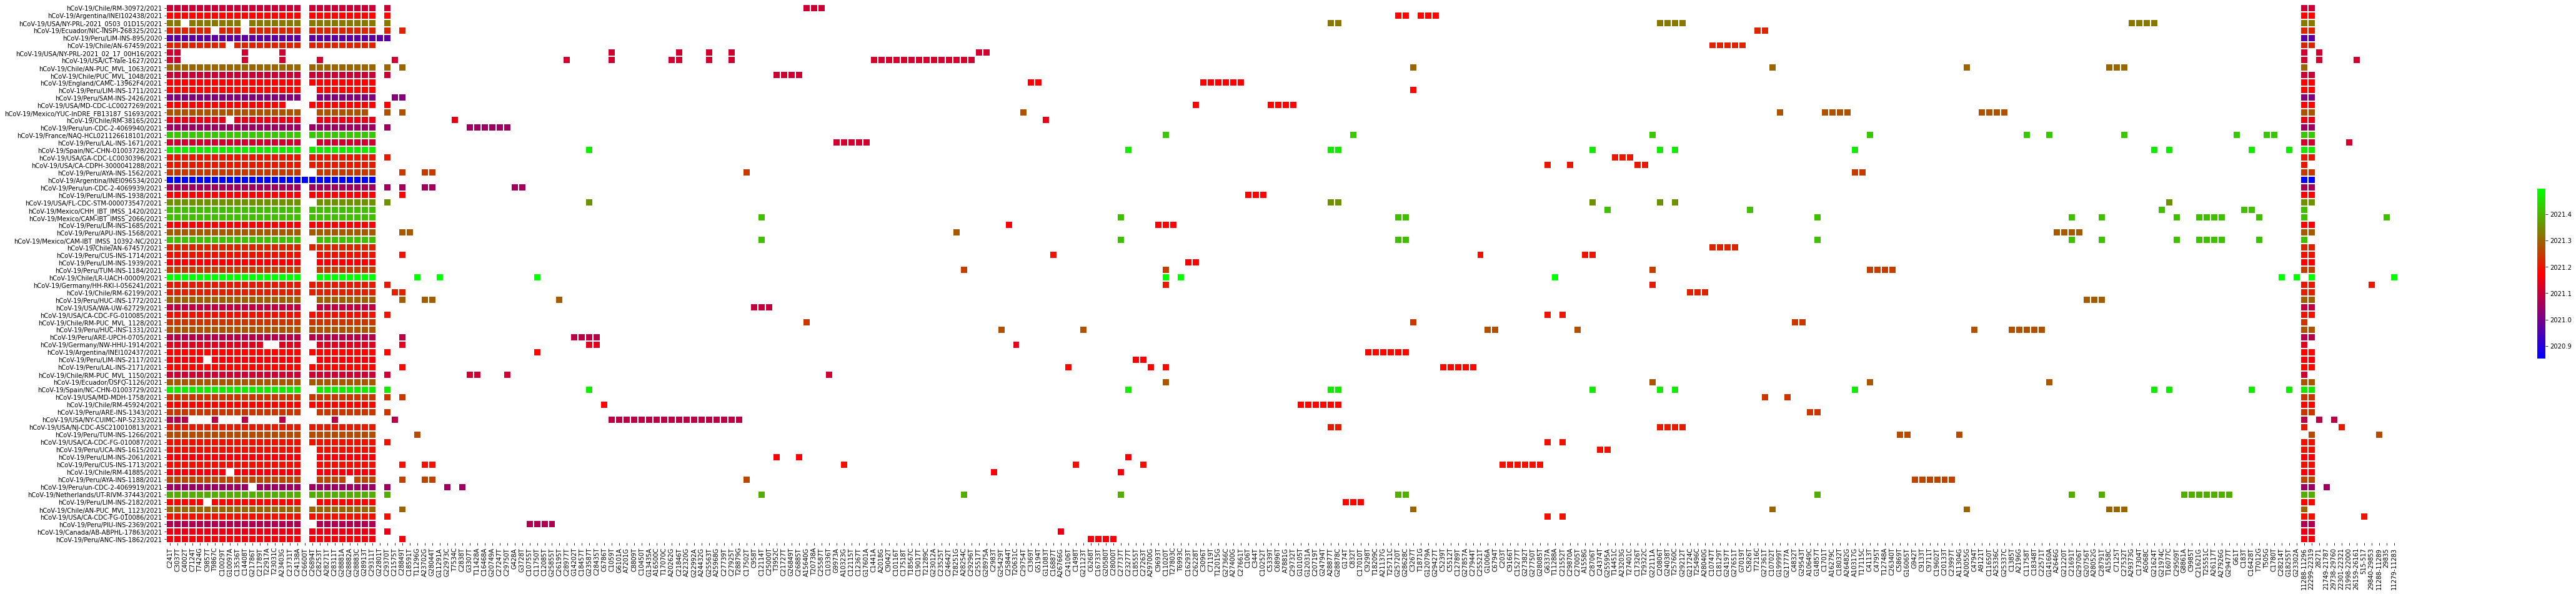

In [ ]:
plt.figure(figsize=(80, 50))
ax = sns.heatmap(genomes_early_nextclade, cmap="brg", xticklabels=1, linewidths=1, linecolor='white', cbar_kws={"shrink": .10}, square=True)

In [ ]:
binary_mutaciones = pd.DataFrame.from_dict(nextclade_aaDEL_binary).T
binary_mutaciones

,11288-11296,22299-22319,28271,21749-21787,22265-22285,29738-29760,22301-22321,21765-21770,21998-22000,26159-26161,22238-22258,25447-25476,28271-28272,27688-27696,11285-11293,27388-27395,509-523,11288-11290,18743-18751,22301-22319,11069-11077,21768-21770,28881-28883,11288-11293,515-517,21090,21992-21994,29840-29853,22292-22312,22034-22054,21990-21992,29725-29775,25714-25716,26158-26161,21749-21785,686-694,1605-1607,28253,28090-28095,29726,...,515-520,29835,29737-29748,22298-22299,29749-29761,22302,26486-26487,29768-29769,29772-29773,29777-29781,29768-29779,29771-29785,27580-27607,27599-27620,29854,7,28090-28092,27583-27618,3333-3335,27290-27292,22298-22300,21776-21778,22220-22240,27601-27625,27682-27695,11279-11283,8651-8683,22202-22222,3953-3961,21562,22298-22309,26,29861,27498-27503,201-204,22299-22317,27682-27693,22277-22297,29746-29762,1820
hCoV-19/Argentina/INEI096534/2020,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hCoV-19/Peru/LIM-INS-869/2020,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hCoV-19/Peru/LIM-INS-895/2020,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hCoV-19/Peru/LIM-UPCH-0372/2021,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hCoV-19/Peru/SAM-INS-2426/2021,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hCoV-19/Ecuador/USFQ-1849/2021,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hCoV-19/Ecuador/USFQ-1856/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
hCoV-19/Switzerland/SO-ETHZ-33628786/2021,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
binary_mutaciones = pd.DataFrame.from_dict(nextclade_mutations_binary).T
binary_mutaciones.shape

(4679, 5554)

In [ ]:
binary_mutaciones = pd.DataFrame.from_dict(nextclade_mutations_binary).T

list_genes = []

for i in range(0,len(aamut_nextclade["mutations_nextclade"])):
  if aamut_nextclade["Frequency absolute"][i] >=100 and aamut_nextclade["Frequency absolute"][i] <= 3079:
    list_genes.append(aamut_nextclade["mutations_nextclade"][i])

pd_b01mutations = binary_mutaciones[list_genes].fillna(0)
pd_b01mutations.head()

,C26894T,C29370T,C21575T,C28849T,T11296G,A23702G,G28044T,G3307T,T11428A,C29750T,G23587T,C28435T,C1059T,G25563T,T3952C,C21727T,C26885T,C10336T,A28254C,C23277T,C11020T,A28877T,G28878C,G25720T,G28628C,T14451C,A23203G,T27401C,C20806T,T25760C,G27361T,G21777A,C4113T
hCoV-19/Argentina/INEI096534/2020,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hCoV-19/Peru/LIM-INS-869/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hCoV-19/Peru/LIM-INS-895/2020,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hCoV-19/Peru/LIM-UPCH-0372/2021,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hCoV-19/Peru/SAM-INS-2426/2021,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pd_b01mutations.shape

(4679, 33)

In [ ]:
pd_b01mutations.to_csv("/content/drive/MyDrive/LBBM_2021/Mutation_search/nt_binary_C37.tsv", sep='\t')